# Homework: Model training in Notebook #

Data source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import pandas as pd

In [2]:
# !pip install pyarrow

In [3]:
df_jan = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df_feb = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

**Q1: Read the data for January. How many records are there?**

In [17]:
df_jan.shape[0]

1154112

In [18]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [19]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [57]:
df_jan['Duration'] = (df_jan['dropOff_datetime'] - df_jan['pickup_datetime']) / pd.Timedelta(minutes=1)

In [58]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


**Q2: What's the average trip duration in January?**

In [10]:
df_jan['Duration'].mean()

19.167224093791006

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

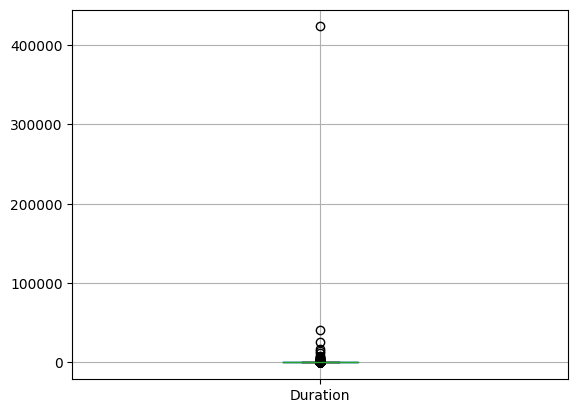

In [11]:
df_jan.boxplot(column='Duration')

In [59]:
df_jan['Duration'].skew()

1038.7002195877537

Duration is highly skewed and there are a lot of outliers.

In [36]:
df_jan['Duration'].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: Duration, dtype: float64

In [66]:
df_jan['Duration'].quantile(0.90)

35.63333333333333

Almost 75% of Duration values are within 22 minutes and 90% of data are having values less than 35.6 minutes.

In [68]:
Q1 = df_jan['Duration'].quantile(0.25)
Q3 = df_jan['Duration'].quantile(0.75)
IQR = Q3 - Q1

Q3 + 1.5 * IQR

44.05833333333334

Upper limit of the inter quartile range is also capped at 44.

Let us consider the data with Duration between 1 and 60 minutes inclusive and see the distribution.

In [71]:
initial_rec_count = df_jan.shape[0]

In [72]:
df_jan = df_jan[(df_jan['Duration'] >= 1) & (df_jan['Duration'] <= 60)]

In [73]:
df_jan.shape

(1109826, 8)

**Q3: How many records did you drop?**

In [74]:
initial_rec_count - df_jan.shape[0]

44286

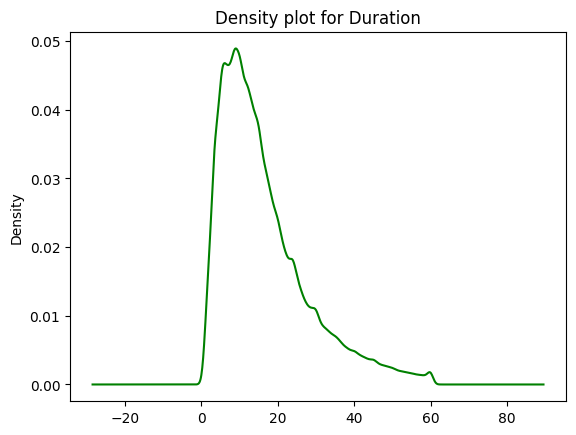

In [75]:
df_jan.Duration.plot.density(color='green')
plt.title('Density plot for Duration')
plt.show()

In [76]:
df_jan.Duration.skew()

1.3123212476459634

Although the data is now a little bit right skewed, we will still go ahead with this dataset without any transformation.

In [78]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


**What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.**

In [81]:
df_jan.PUlocationID.isna().sum() / df_jan.shape[0]

0.8352732770722617

In [82]:
df_jan['PUlocationID'].fillna(-1, inplace=True)
df_jan['DOlocationID'].fillna(-1, inplace=True)

In [87]:
sum(df_jan.PUlocationID == -1) / df_jan.shape[0]

0.8352732770722617

We will be using Pick up and Drop location IDs for our model training.

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
categorical_cols = ['PUlocationID', 'DOlocationID']

In [111]:
df_jan = df_jan[categorical_cols + ['Duration']]

In [112]:
df_jan[categorical_cols] = df_jan[categorical_cols].astype(str)

In [113]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   PUlocationID  1109826 non-null  object 
 1   DOlocationID  1109826 non-null  object 
 2   Duration      1109826 non-null  float64
dtypes: float64(1), object(2)
memory usage: 33.9+ MB


In [91]:
from sklearn.feature_extraction import DictVectorizer

In [114]:
train_dicts = df_jan[categorical_cols].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [115]:
y_train = df_jan['Duration'].values

**Q5: What's the dimensionality of this matrix? (The number of columns).**

In [116]:
X_train.shape

(1109826, 525)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Q6: What's the RMSE on train?**

In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519425310185

Now, let's put data preprocssing steps in a function so that we can process the validation set in the same way as well.

In [127]:
def read_data(filename, cat_cols):
    if filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
        
        df['Duration'] = (df['dropOff_datetime'] - df['pickup_datetime']) / pd.Timedelta(minutes=1)
        
        df = df[(df.Duration >= 1) & (df.Duration <= 60)]
        
        df[cat_cols] = df[cat_cols].astype(str)
        
        print(filename, '\n', df.shape)
        
        return df

In [128]:
cat_cols = ['PUlocationID', 'DOlocationID']

df_jan = read_data('./data/fhv_tripdata_2021-01.parquet', cat_cols)
df_feb = read_data('./data/fhv_tripdata_2021-02.parquet', cat_cols)

./data/fhv_tripdata_2021-01.parquet 
 (1109826, 8)
./data/fhv_tripdata_2021-02.parquet 
 (990113, 8)


In [129]:
dv = DictVectorizer()

train_dicts = df_jan[cat_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_feb[cat_cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [130]:
target = 'Duration'
y_train = df_jan[target].values
y_val = df_feb[target].values

**Q7: What's the RMSE on validation?**

In [131]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014285900683332

## Why MLOps as we learn from such excercise ##

**Experiment Tracking**

Imagine using various parameters and hyper-parameters, and checking the output of it for every such iteration. That is a daunting task, isn't it? We might get lost in midst of a lot of information if done manually. Instead, we can log such data to somewhere that we can help us in tracking all of our experiments for reproducibility and to make the right decision.

**Model Registry**

Not only just the tracking of input parameters and corresponding output mapping will do the job. We need to save the actual trained model from that experiment to use in later point of time as well. Hence we need to put the model in the model registry that mostly goes hand in hand with the experiment tracking.

**ML Pipelines**

Like the taxi trip duration prediction example here, while working with notebooks we tend to put in the code in various cells for various tasks. Sometimes the work gets messy and it becomes a difficult task to traverse and find out the logical sequence in order to reproduce the result. There might be some steps that need to run only once and rest multiple times. They might have some internal dependencies as well. There in ML pipelines come to rescue where we decompose the code and bind them in a logical fashion controlled by parameters. This helps in better code management.

**Serving**

In most of the cases the output of a ML pipeline is a model. We put that model in a web service so that in real world scenario we can get the prediction result on unseen data in an API call. This is what we call as Inference Service. Of course, there are other ways for the model to be served as well and we will discuss more about that in following weeks.

**Monitoring**

The model is developed and deployed, and serving in the production as well. Are we done? No, we are not done yet. Over the time the data might change, the concepts and business processes and significance might change, hence the model performance might deter as well. We need to monitor the model performance for such scenarios and take necessary steps that might involve model retraining as well.

**Automation**

Detecting model performance changes, finding data drift, retraining the model and auto deploying without human involvement implies the highest level of automation. For that to take place we need to have complete trust in the process. When we can aspire for this level of engineering, we end up with various levels of automation considering the practical implications amd operational maturity.

Microsoft came up with an MLOps maturity model that helps in deciding progressive requirements and establishing appropriate processes.  

Link: https://docs.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-maturity-model